In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject.present_value_function

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Relevance between 30-year morgage bond rates and apartment prices in Copenhagen

We want to see if there's a significance between the 30-year morgage bond rate in a time series and the real-estate prices for apartment in Copenhagen over the last 10 years.

## Importing the modules we need for fetching, manipulating and presenting the data we need

We start out by importing pandas and numpy for fetching and manipulating the data we need as dataframes.

In [69]:
import pandas as pd
import numpy as np

Next step is to import matplotlib to be able to present the results.

In [70]:
import matplotlib.pyplot as plt

As we have chosen to fetch the data we need from dst through API, the last step is to import the API package we have installed. Note: This requires installation of "pip install git+https://github.com/elben10/pydst" in the terminal(MAC)/cmd(Windows).

In [71]:
import pydst
Dst = pydst.Dst(lang='da')

## Fetching the data we need from dst

From DST we need the consumer price index and the real-estate price index. We will use these indices to deflate the real-estate price index for later comparison to the morgage bond rates.

We start out by fetching the list of variables in the consumerprice index we have chosen from DST which is called "Pris112"

### Fetching the consumerprice index

In [72]:
forpris_vars = Dst.get_variables(table_id='PRIS112')
forpris_vars

,elimination,id,text,time,values
0,False,HOVED,hovedtal,False,"[{'id': '1005', 'text': 'Årsgennemsnit'}, {'id..."
1,False,Tid,tid,True,"[{'id': '1980', 'text': '1980'}, {'id': '1981'..."


Now we know the name of the variables in the table and the id's we need to call the values of these variables.

We can then get the data we need for the consumerprice index.

In [73]:
forprisindex = Dst.get_data(table_id = 'PRIS112', variables={'HOVED':['1005'], 'tid':['*']})
forprisindex

,HOVED,TID,INDHOLD
0,Årsgennemsnit,1980,"34,8"
1,Årsgennemsnit,1981,"38,9"
2,Årsgennemsnit,1982,"42,8"
3,Årsgennemsnit,1983,"45,7"
4,Årsgennemsnit,1984,"48,6"
5,Årsgennemsnit,1985,"50,9"
6,Årsgennemsnit,1986,"52,8"
7,Årsgennemsnit,1987,"54,9"
8,Årsgennemsnit,1988,"57,4"
9,Årsgennemsnit,1989,"60,1"


Next we cut the dataframe for the consumerprice index to match it with the next dataframe we will get. We remove the first 12 rows and rename the columns.

In [74]:
forprisindex=forprisindex.iloc[12:,]
forprisindex=forprisindex.reset_index(drop=True)
forprisindex.rename(
    columns={
        "TID": "Year (average)",
        "INDHOLD": "Consumerpriceindex (2015=100)"
    },
    inplace=True
)
forprisindex

,HOVED,Year (average),Consumerpriceindex (2015=100)
0,Årsgennemsnit,1992,"64,5"
1,Årsgennemsnit,1993,"65,3"
2,Årsgennemsnit,1994,"66,6"
3,Årsgennemsnit,1995,"68,0"
4,Årsgennemsnit,1996,"69,5"
5,Årsgennemsnit,1997,"71,0"
6,Årsgennemsnit,1998,"72,3"
7,Årsgennemsnit,1999,"74,1"
8,Årsgennemsnit,2000,"76,2"
9,Årsgennemsnit,2001,"78,0"


### Fetching the real-estate price index

The next step is to fetch the data for the real-estate price index. We begin by getting the variables for the dataset. For this, the table "EJ55" is chosen from DST.

In [75]:
ejpris_vars = Dst.get_variables(table_id='EJ55')
ejpris_vars

,elimination,id,map,text,time,values
0,True,OMRÅDE,Denmark_rural_07,område,False,"[{'id': '000', 'text': 'Hele landet'}, {'id': ..."
1,False,EJENDOMSKATE,NaN,ejendomskategori,False,"[{'id': '0111', 'text': 'Enfamiliehuse'}, {'id..."
2,False,TAL,NaN,enhed,False,"[{'id': '100', 'text': 'Indeks'}, {'id': '210'..."
3,False,Tid,NaN,tid,True,"[{'id': '1992K1', 'text': '1992K1'}, {'id': '1..."


To get a better idea of the values in each category, we create a sample list of each of the 4 variables.

In [76]:
ejpris_vars['values'][0][:10]

[{'id': '000', 'text': 'Hele landet'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '01', 'text': 'Landsdel Byen København'},
 {'id': '02', 'text': 'Landsdel Københavns omegn'},
 {'id': '03', 'text': 'Landsdel Nordsjælland'},
 {'id': '04', 'text': 'Landsdel Bornholm'},
 {'id': '085', 'text': 'Region Sjælland'},
 {'id': '05', 'text': 'Landsdel Østsjælland'},
 {'id': '06', 'text': 'Landsdel Vest- og Sydsjælland'},
 {'id': '083', 'text': 'Region Syddanmark'}]

In [77]:
ejpris_vars['values'][1][:10]

[{'id': '0111', 'text': 'Enfamiliehuse'},
 {'id': '0801', 'text': 'Sommerhuse'},
 {'id': '2103', 'text': 'Ejerlejligheder, i alt'}]

In [78]:
ejpris_vars['values'][2][:10]

[{'id': '100', 'text': 'Indeks'},
 {'id': '210', 'text': 'Ændring i pct. i forhold til kvartalet før'},
 {'id': '310', 'text': 'Ændring i pct. i forhold til samme kvartal året før'}]

In [79]:
ejpris_vars['values'][3][:10]

[{'id': '1992K1', 'text': '1992K1'},
 {'id': '1992K2', 'text': '1992K2'},
 {'id': '1992K3', 'text': '1992K3'},
 {'id': '1992K4', 'text': '1992K4'},
 {'id': '1993K1', 'text': '1993K1'},
 {'id': '1993K2', 'text': '1993K2'},
 {'id': '1993K3', 'text': '1993K3'},
 {'id': '1993K4', 'text': '1993K4'},
 {'id': '1994K1', 'text': '1994K1'},
 {'id': '1994K2', 'text': '1994K2'}]

We have chosen to focus on the index of apartment-prices in Copenhagen and use the index-number from the fourth quarter every year.

This means we have to get all the id's for the fourth quarter of every year to put into our API call. We do this by creating a list of the id's we need.

In [80]:
TIDID=ejpris_vars['values'][3][:]
K4=TIDID[3::4]
K4

[{'id': '1992K4', 'text': '1992K4'},
 {'id': '1993K4', 'text': '1993K4'},
 {'id': '1994K4', 'text': '1994K4'},
 {'id': '1995K4', 'text': '1995K4'},
 {'id': '1996K4', 'text': '1996K4'},
 {'id': '1997K4', 'text': '1997K4'},
 {'id': '1998K4', 'text': '1998K4'},
 {'id': '1999K4', 'text': '1999K4'},
 {'id': '2000K4', 'text': '2000K4'},
 {'id': '2001K4', 'text': '2001K4'},
 {'id': '2002K4', 'text': '2002K4'},
 {'id': '2003K4', 'text': '2003K4'},
 {'id': '2004K4', 'text': '2004K4'},
 {'id': '2005K4', 'text': '2005K4'},
 {'id': '2006K4', 'text': '2006K4'},
 {'id': '2007K4', 'text': '2007K4'},
 {'id': '2008K4', 'text': '2008K4'},
 {'id': '2009K4', 'text': '2009K4'},
 {'id': '2010K4', 'text': '2010K4'},
 {'id': '2011K4', 'text': '2011K4'},
 {'id': '2012K4', 'text': '2012K4'},
 {'id': '2013K4', 'text': '2013K4'},
 {'id': '2014K4', 'text': '2014K4'},
 {'id': '2015K4', 'text': '2015K4'},
 {'id': '2016K4', 'text': '2016K4'},
 {'id': '2017K4', 'text': '2017K4'},
 {'id': '2018K4', 'text': '2018K4'}]

Then we single out all the id's in a new list

In [81]:
K4id = []
for row in K4:
    K4id.append(row['id'])
K4id

['1992K4',
 '1993K4',
 '1994K4',
 '1995K4',
 '1996K4',
 '1997K4',
 '1998K4',
 '1999K4',
 '2000K4',
 '2001K4',
 '2002K4',
 '2003K4',
 '2004K4',
 '2005K4',
 '2006K4',
 '2007K4',
 '2008K4',
 '2009K4',
 '2010K4',
 '2011K4',
 '2012K4',
 '2013K4',
 '2014K4',
 '2015K4',
 '2016K4',
 '2017K4',
 '2018K4']

Lastly we create the input-string for the API-call

In [82]:
K4input=''
for year in K4id:
    K4input +=  year + ','
K4input

'1992K4,1993K4,1994K4,1995K4,1996K4,1997K4,1998K4,1999K4,2000K4,2001K4,2002K4,2003K4,2004K4,2005K4,2006K4,2007K4,2008K4,2009K4,2010K4,2011K4,2012K4,2013K4,2014K4,2015K4,2016K4,2017K4,2018K4,'

Now we can fetch the data we need from the real-estate price index. While we're at it, we rename some of the columns.

In [83]:
ejprisindex = Dst.get_data(table_id = 'EJ55', variables={'OMRÅDE':['01'], 'EJENDOMSKATE':['2103'], 'TAL':['100'], 'Tid':[K4input]})
ejprisindex.rename(
    columns={
        "INDHOLD": "Priceindex for sold apartments (2006=100)",
        "TID": "Year (Q4)"
    },
    inplace=True
)
ejprisindex

,OMRÅDE,EJENDOMSKATE,TAL,Year (Q4),Priceindex for sold apartements (2006=100)
0,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1992K4,"13,9"
1,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1993K4,"14,5"
2,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1994K4,"14,8"
3,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1995K4,"16,8"
4,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1996K4,"20,1"
5,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1997K4,"22,1"
6,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1998K4,"28,6"
7,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1999K4,"33,2"
8,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2000K4,"39,7"
9,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2001K4,"45,7"


## Putting the data together and creating new values

Now it is time to put the two dataframes together. We do this by concatenating the two dataframes as we don't have similar columns in the two sets, which exclude a join.

In [84]:
samlet2015priser=pd.concat([ejprisindex,forprisindex], axis=1)
samlet2015priser

,OMRÅDE,EJENDOMSKATE,TAL,Year (Q4),Priceindex for sold apartements (2006=100),HOVED,Year (average),Consumerpriceindex (2015=100)
0,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1992K4,"13,9",Årsgennemsnit,1992,"64,5"
1,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1993K4,"14,5",Årsgennemsnit,1993,"65,3"
2,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1994K4,"14,8",Årsgennemsnit,1994,"66,6"
3,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1995K4,"16,8",Årsgennemsnit,1995,"68,0"
4,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1996K4,"20,1",Årsgennemsnit,1996,"69,5"
5,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1997K4,"22,1",Årsgennemsnit,1997,"71,0"
6,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1998K4,"28,6",Årsgennemsnit,1998,"72,3"
7,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1999K4,"33,2",Årsgennemsnit,1999,"74,1"
8,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2000K4,"39,7",Årsgennemsnit,2000,"76,2"
9,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2001K4,"45,7",Årsgennemsnit,2001,"78,0"


Next we drop the columns we don't need

In [85]:
samlet2015priser = samlet2015priser.drop(["HOVED", "Year (average)"], axis=1)
samlet2015priser

,OMRÅDE,EJENDOMSKATE,TAL,Year (Q4),Priceindex for sold apartements (2006=100),Consumerpriceindex (2015=100)
0,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1992K4,"13,9","64,5"
1,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1993K4,"14,5","65,3"
2,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1994K4,"14,8","66,6"
3,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1995K4,"16,8","68,0"
4,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1996K4,"20,1","69,5"
5,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1997K4,"22,1","71,0"
6,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1998K4,"28,6","72,3"
7,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1999K4,"33,2","74,1"
8,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2000K4,"39,7","76,2"
9,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2001K4,"45,7","78,0"


As we now need to manipulate some of the data in the dataframe and create new variables, we need to find out which types of data we have in the dataframe and change the ones we need.

In [86]:
samlet2015priser.dtypes

OMRÅDE                                        object
EJENDOMSKATE                                  object
TAL                                           object
Year (Q4)                                     object
Priceindex for sold apartements (2006=100)    object
Consumerpriceindex (2015=100)                 object
dtype: object

As the price indices are fetched as strings, we need to convert these into floats which also means changing "," to ".".

In [87]:
samlet2015priser['Priceindex for sold apartments (2006=100)'] = [x.replace(',', '.') for x in samlet2015priser['Priceindex for sold apartments (2006=100)']]
samlet2015priser['Consumerpriceindex (2015=100)'] = [x.replace(',', '.') for x in samlet2015priser['Consumerpriceindex (2015=100)']]
samlet2015priser['Priceindex for sold apartments (2006=100)']=samlet2015priser['Priceindex for sold apartments (2006=100)'].astype(float)
samlet2015priser['Consumerpriceindex (2015=100)']=samlet2015priser['Consumerpriceindex (2015=100)'].astype(float)

As our indices are floats now, we need to change the base-year for the apartment price index to correspond to our consumer price index, and afterwards deflate the apartment price index.

In [88]:
samlet2015priser['Priceindex for sold apartments (2015=100)']=samlet2015priser['Priceindex for sold apartments (2006=100)']*100/113.8
samlet2015priser['Inflation adjusted priceindex']= samlet2015priser['Priceindex for sold apartments (2015=100)']/samlet2015priser['Consumerpriceindex (2015=100)']*100
samlet2015priser

,OMRÅDE,EJENDOMSKATE,TAL,Year (Q4),Priceindex for sold apartements (2006=100),Consumerpriceindex (2015=100),Priceindex for sold apartements (2015=100),Inflation adjusted priceindex
0,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1992K4,13.9,64.5,12.214411,18.937072
1,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1993K4,14.5,65.3,12.741652,19.512484
2,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1994K4,14.8,66.6,13.005272,19.527436
3,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1995K4,16.8,68.0,14.762742,21.709914
4,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1996K4,20.1,69.5,17.662566,25.413764
5,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1997K4,22.1,71.0,19.420035,27.352162
6,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1998K4,28.6,72.3,25.131810,34.760457
7,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1999K4,33.2,74.1,29.173989,39.371106
8,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2000K4,39.7,76.2,34.885764,45.781843
9,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2001K4,45.7,78.0,40.158172,51.484836


## importing the morgage bond rates and calculating the present values

The morgage bond rates have been downloaded from Finansdanmark, and been sorted in an excel-sheet to only include the values we need. We can then proceed to import them as a dataframe.

In [89]:
rates = pd.read_excel('Morgagebond_rates.xlsx', converters={'Year':int})
rates

,Year,Short_rates,Long_rates
0,1999,3.48000,6.19000
1,2000,4.79000,7.25000
2,2001,5.01000,6.74000
3,2002,4.10000,6.61000
4,2003,2.62000,5.50000
5,2004,2.17000,5.18000
6,2005,2.37000,4.53000
7,2006,3.20000,5.09000
8,2007,4.24000,5.18000
9,2008,4.30000,5.72000


We then define a function for caluclating the present value of a yearly payment of 1 kr. paid in 30 years at rate x.

In [90]:
def present_value(rate):
    try:
        return (1 - (1 + rate/100)**-30)/rate/100 
        #return 1
    except:
        print('Error: Check input')

Now we add the present value of 1 kr. as a column in rates, based on the long _rates.

In [91]:
rates['PV_Long_rates'] = present_value(rates['Long_rates'])
rates

,Year,Short_rates,Long_rates,PV_Long_rates
0,1999,3.48000,6.19000,0.001349
1,2000,4.79000,7.25000,0.001210
2,2001,5.01000,6.74000,0.001274
3,2002,4.10000,6.61000,0.001291
4,2003,2.62000,5.50000,0.001453
5,2004,2.17000,5.18000,0.001506
6,2005,2.37000,4.53000,0.001623
7,2006,3.20000,5.09000,0.001522
8,2007,4.24000,5.18000,0.001506
9,2008,4.30000,5.72000,0.001419


The last step is to create an index for the present values and set the baseyear to 2015.

In [92]:
base_year = rates.iloc[16, 3]
rates['Index'] = rates['PV_Long_rates'] / base_year * 100

rates

,Year,Short_rates,Long_rates,PV_Long_rates,Index
0,1999,3.48000,6.19000,0.001349,61.563444
1,2000,4.79000,7.25000,0.001210,55.238943
2,2001,5.01000,6.74000,0.001274,58.143774
3,2002,4.10000,6.61000,0.001291,58.923989
4,2003,2.62000,5.50000,0.001453,66.329403
5,2004,2.17000,5.18000,0.001506,68.740252
6,2005,2.37000,4.53000,0.001623,74.077888
7,2006,3.20000,5.09000,0.001522,69.443049
8,2007,4.24000,5.18000,0.001506,68.740252
9,2008,4.30000,5.72000,0.001419,64.748107


## assembling the two datasets

Once again we have a mismatch of rows and data in the "samlet2015priser" and "rates" datasets. As we don't need rows where we don't have complete data in either of the two dataframs, we start by removing the rows we don't need.

In [93]:
rates=rates.iloc[:20,]
rates

,Year,Short_rates,Long_rates,PV_Long_rates,Index
0,1999,3.48000,6.19000,0.001349,61.563444
1,2000,4.79000,7.25000,0.001210,55.238943
2,2001,5.01000,6.74000,0.001274,58.143774
3,2002,4.10000,6.61000,0.001291,58.923989
4,2003,2.62000,5.50000,0.001453,66.329403
5,2004,2.17000,5.18000,0.001506,68.740252
6,2005,2.37000,4.53000,0.001623,74.077888
7,2006,3.20000,5.09000,0.001522,69.443049
8,2007,4.24000,5.18000,0.001506,68.740252
9,2008,4.30000,5.72000,0.001419,64.748107


In [94]:
samlet2015priser=samlet2015priser.iloc[7:,]
samlet2015priser=samlet2015priser.reset_index(drop=True)
samlet2015priser

,OMRÅDE,EJENDOMSKATE,TAL,Year (Q4),Priceindex for sold apartements (2006=100),Consumerpriceindex (2015=100),Priceindex for sold apartements (2015=100),Inflation adjusted priceindex
0,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1999K4,33.2,74.1,29.173989,39.371106
1,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2000K4,39.7,76.2,34.885764,45.781843
2,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2001K4,45.7,78.0,40.158172,51.484836
3,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2002K4,51.0,79.9,44.815466,56.089444
4,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2003K4,53.9,81.6,47.363796,58.043868
5,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2004K4,63.9,82.5,56.151142,68.061991
6,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2005K4,88.1,84.0,77.416520,92.162524
7,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2006K4,98.5,85.6,86.555360,101.116075
8,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2007K4,86.3,87.1,75.834798,87.066358
9,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2008K4,74.0,90.1,65.026362,72.171323


Now we insert the index of the present values from rates into a new column in samlet2015priser.

In [95]:
samlet2015priser['PV index (2015=100)']=rates['Index']
samlet2015priser

,OMRÅDE,EJENDOMSKATE,TAL,Year (Q4),Priceindex for sold apartements (2006=100),Consumerpriceindex (2015=100),Priceindex for sold apartements (2015=100),Inflation adjusted priceindex,PV index (2015=100)
0,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,1999K4,33.2,74.1,29.173989,39.371106,61.563444
1,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2000K4,39.7,76.2,34.885764,45.781843,55.238943
2,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2001K4,45.7,78.0,40.158172,51.484836,58.143774
3,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2002K4,51.0,79.9,44.815466,56.089444,58.923989
4,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2003K4,53.9,81.6,47.363796,58.043868,66.329403
5,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2004K4,63.9,82.5,56.151142,68.061991,68.740252
6,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2005K4,88.1,84.0,77.416520,92.162524,74.077888
7,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2006K4,98.5,85.6,86.555360,101.116075,69.443049
8,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2007K4,86.3,87.1,75.834798,87.066358,68.740252
9,Landsdel Byen København,"Ejerlejligheder, i alt",Indeks,2008K4,74.0,90.1,65.026362,72.171323,64.748107


## Presenting the results

To illustrate the relationship between the rates and the apartment prices we create a simple graph with the index-values over time.

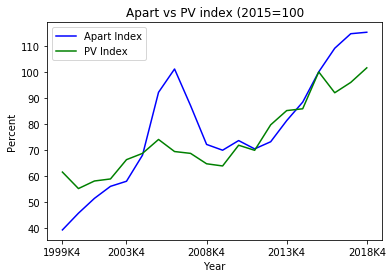

In [96]:
plt.plot(samlet2015priser['Year (Q4)'], samlet2015priser['Inflation adjusted priceindex'], 'b-', label='Apart Index')
plt.plot(samlet2015priser['Year (Q4)'], samlet2015priser['PV index (2015=100)'], 'g-', label='PV Index')
plt.legend(loc='best')
plt.xticks(['1999K4','2003K4','2008K4','2013K4','2018K4'])
plt.ylabel('Percent')
plt.xlabel('Year')
plt.title('Apart vs PV index (2015=100')
plt.show()

To illustrate further, we calculate the correlation coeficciant between the present values and the apartment prices.

In [97]:
np.corrcoef(samlet2015priser['PV index (2015=100)'], samlet2015priser['Inflation adjusted priceindex'])

array([[1.        , 0.85024971],
       [0.85024971, 1.        ]])

We see a clear correlation between the long term interest-rates of morgage-bond rates and the prices of apartments in Copenhagen in this simple data-analysis. It is however important to state that including more variables in the dataset, might result in a clearer picture of the forces behind the priceflow of apartment prices.